# Project 2
## least squares regression and nearest neighbor classifiers

### Members:
* Akhilesh Vyas
* Pooja Bhatia
* Asif Altaf 
* Abakar Bouba
* Mehdi Ali
* Seyithan Dag
* Mihail Luchian
* Muhammad Hassan Farooq
* Utkrist Adhikari
* Julian Tanke

### task 2.1 least squares regression for missing value prediction

Least squares polynomial fit with loss $E(w) = \big\vert\big\vert Xw -y \big\vert\big\vert^2$:

$$
w = \big( X^T X\big)^{-1} X^T y
$$

$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots  & x_1^d \\ 
 &  &  & \vdots  & \\ 
1 & x_n & x_n^2 & \cdots & x_n^d
\end{bmatrix}, \ \ \ \ y = \begin{bmatrix}
y_1 \\
\vdots \\ 
y_n\\ 
\end{bmatrix}
$$

For this task fit models for $d\in \{ 1, 5, 10\}$

(21, 5)
[  7001.65463257 -24415.73449707  31898.38696289 -18502.96557617
   4020.6633606 ]
[ -96.81123269  166.9569358     2.97514561 -127.10299585   54.21156173]


/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RankWarning: Polyfit may be poorly conditioned


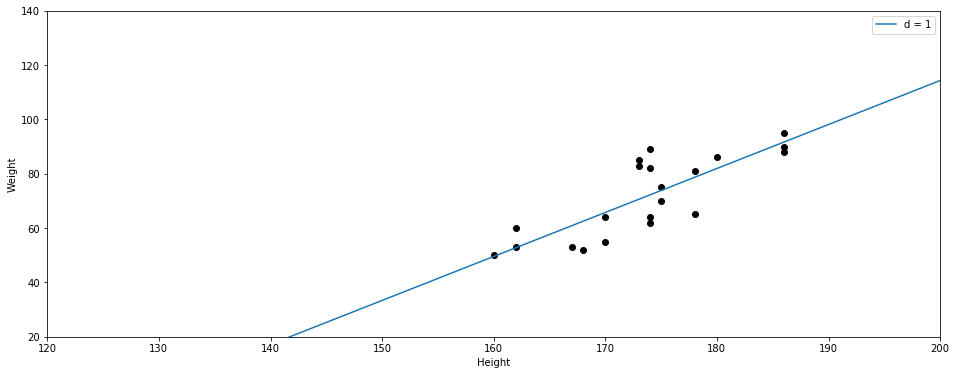

In [193]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.linalg import inv

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

data = np.loadtxt('whData.dat',
                  dtype=np.object,
                  comments='#',
                  delimiter=None)

W = data[:,0].astype('float32')
H = data[:,1].astype('float32')
G = data[:,2]

w_mask = ((W > 0) * 1).nonzero()

W = W[w_mask]
H = H[w_mask]
G = G[w_mask]

# to make the code more numerically stable we down-scale it by some large number
# so that all values are between 0 and 1
scale = 200
W = W/scale
H = H/scale

# solve the solution "zufuss"
# ------------ d = 1 ----------
X = np.vander(H, 1+1)    # (21,2)
y = np.array([W]).T    # (21,1)
w = inv(X.T @ X) @ (X.T @ y)
ax.plot([0, 500], [w[0] * 0 + w[1], w[0] * 500 + w[1]], 
         label='d = 1')
#w = w * 200
# ------------ d = 5 ----------
X = np.vander(H, 4+1)
print(X.shape)
y = np.array([W]).T        # (21,1)

w = inv(X.T @ X) @ (X.T @ y)

print(np.squeeze(w))

w = np.polyfit(x=H, y=W, deg=4)
print(w)

ax.scatter(H, W, color='black')
ax.set_ylim([0.1, 0.7])
ax.set_xlim([0.6, 1])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

ax.set_xticklabels([int(x * scale) for x in ax.get_xticks()])
ax.set_yticklabels([int(y * scale) for y in ax.get_yticks()])

plt.legend()
plt.show()